<a href="https://colab.research.google.com/github/benvictoria21/pandas/blob/master/Suicide_rates_and_possible_causes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

import seaborn as sns

from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [24]:
suicide_rates=pd.read_csv('https://raw.githubusercontent.com/benvictoria21/pandas/master/dataset/master.csv')

In [25]:
suicide_rates.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [26]:
suicide_rates.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [27]:
suicide_rates.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [28]:
del suicide_rates['country-year']
del suicide_rates['HDI for year']

In [29]:
suicide_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7    gdp_for_year ($)   27820 non-null  object 
 8   gdp_per_capita ($)  27820 non-null  int64  
 9   generation          27820 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 2.1+ MB


In [30]:
def detect_outliers(df,columnNames):
    #df=dataframe for example suicide_rates
    outlier_indices=[]
    for c in columnNames:
        #1st Quartile
        Q1=np.percentile(df[c],25)
        #3rd Quartile
        Q3=np.percentile(df[c],75)
        #IQR
        IQR=Q3-Q1
        #Outlier Step
        outlier_step=IQR * 1.5
        #detect outlier and ther indices
        outlier_list_col=df[(df[c]<Q1-outlier_step) | (df[c]>Q3+outlier_step)].index
        #store indeces
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices=Counter(outlier_indices)
    multiple_outliers=list(i for i,v in outlier_indices.items() if v>1)
    return multiple_outliers

In [31]:
suicide_rates.loc[detect_outliers(suicide_rates,['population','gdp_per_capita ($)','suicides/100k pop'])]

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
9087,France,1985,male,55-74 years,2363,4471600,52.84,"553,138,414,367",10765,G.I. Generation
9088,France,1985,male,35-54 years,2752,6799400,40.47,"553,138,414,367",10765,Silent
9099,France,1986,male,55-74 years,2382,4450700,53.52,"771,470,783,218",14940,G.I. Generation
9100,France,1986,male,35-54 years,2847,6825300,41.71,"771,470,783,218",14940,Silent
9111,France,1987,male,55-74 years,2198,4576100,48.03,"934,173,305,686",17999,G.I. Generation
...,...,...,...,...,...,...,...,...,...,...
24918,Switzerland,2011,male,75+ years,125,243790,51.27,"699,579,638,638",93053,Silent
24930,Switzerland,2012,male,75+ years,129,250132,51.57,"668,043,614,123",87951,Silent
24942,Switzerland,2013,male,75+ years,146,256661,56.88,"688,504,173,431",89634,Silent
24954,Switzerland,2014,male,75+ years,144,267638,53.80,"709,182,559,935",90809,Silent


In [32]:
suicide_rates=suicide_rates.drop(detect_outliers(suicide_rates,['population','gdp_per_capita ($)','suicides/100k pop']),axis=0).reset_index(drop=True)

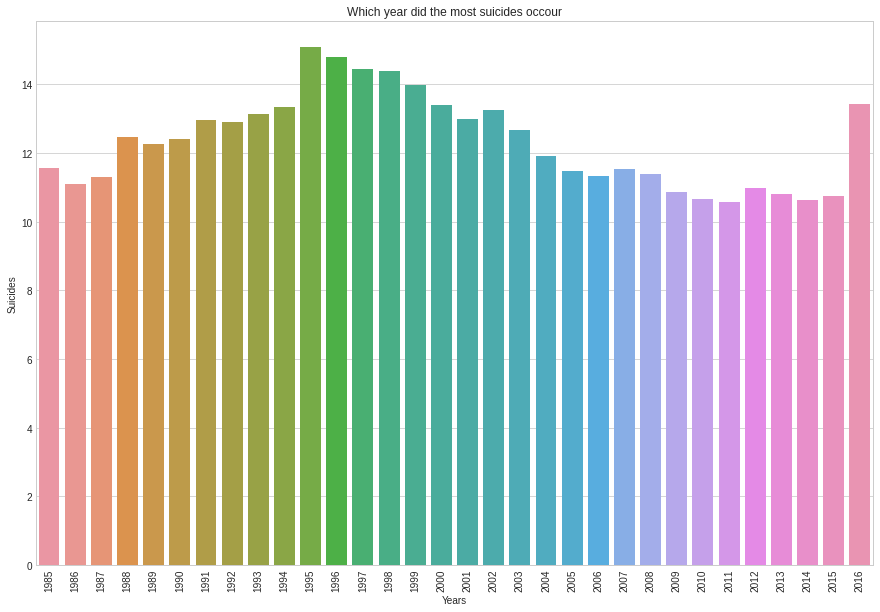

In [33]:
year_list=list(suicide_rates.year.unique())
year_suicide_ratio=[]
for i in year_list:
    a=suicide_rates[suicide_rates['year']==i]
    year_suicide_rate=sum(a['suicides/100k pop'])/len(a)
    year_suicide_ratio.append(year_suicide_rate)
data=pd.DataFrame({'year_list':year_list,'year_suicide_ratio':year_suicide_ratio})
new_index=(data['year_suicide_ratio'].sort_values(ascending=True)).index.values
sorted_data=data.reindex(new_index)


# visualization
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data['year_list'],y=sorted_data['year_suicide_ratio'])
plt.xticks(rotation=90)
plt.xlabel('Years')
plt.ylabel('Suicides')
plt.title('Which year did the most suicides occour')
plt.show()

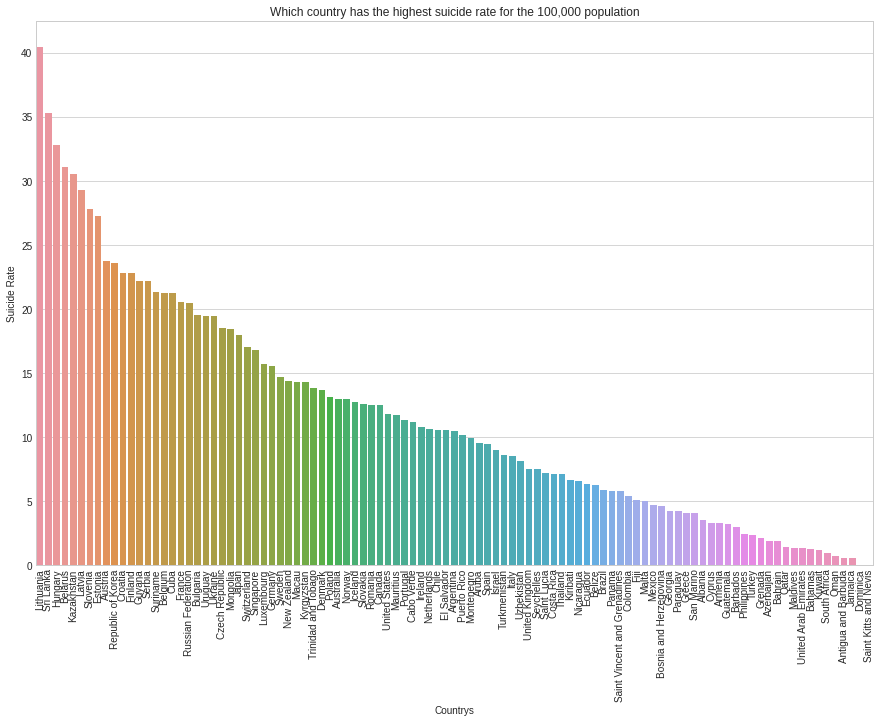

In [34]:
country_list=list(suicide_rates.country.unique())
country_suicide_ratio=[]

for i in country_list:
    a=suicide_rates[suicide_rates['country']==i]
    country_suicide_rate=sum(a['suicides/100k pop'])/len(a)
    country_suicide_ratio.append(country_suicide_rate)

data=pd.DataFrame({'country_list':country_list,'country_suicide_ratio':country_suicide_ratio})
new_index=(data['country_suicide_ratio'].sort_values(ascending=False)).index.values
sorted_data=data.reindex(new_index)


# visualization
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data['country_list'],y=sorted_data['country_suicide_ratio'])
plt.xticks(rotation=90)
plt.xlabel('Countrys')
plt.ylabel('Suicide Rate')
plt.title('Which country has the highest suicide rate for the 100,000 population')
plt.show()

In [35]:
suicide_rates[['age','suicides/100k pop']].groupby(['age'],as_index=False).mean().sort_values(by='suicides/100k pop',ascending=False)

,age,suicides/100k pop
5,75+ years,23.605415
4,55-74 years,15.233734
2,35-54 years,13.997291
1,25-34 years,11.815363
0,15-24 years,8.793549
3,5-14 years,0.619707


In [36]:
suicide_rates[['sex','suicides/100k pop']].groupby(['sex'],as_index=False).mean().sort_values(by='suicides/100k pop',ascending=False)

,sex,suicides/100k pop
1,male,19.411135
0,female,5.380834


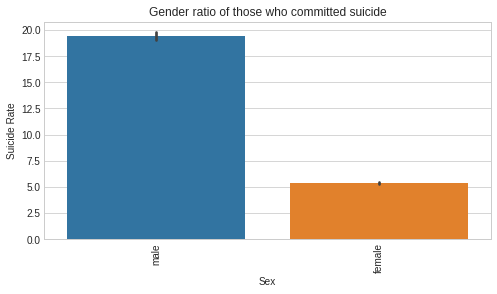

In [37]:
plt.figure(figsize=(8,4))
sns.barplot(x=suicide_rates['sex'],y=suicide_rates['suicides/100k pop'])
plt.xticks(rotation=90)
plt.xlabel("Sex")
plt.ylabel("Suicide Rate")
plt.title("Gender ratio of those who committed suicide")
plt.show()

In [38]:
suicide_rates[['generation','suicides/100k pop']].groupby(['generation'],as_index=False).mean().sort_values(by='suicides/100k pop',ascending=False)

,generation,suicides/100k pop
1,G.I. Generation,23.607357
5,Silent,17.682384
0,Boomers,13.847951
2,Generation X,10.216633
4,Millenials,5.270591
3,Generation Z,0.641310


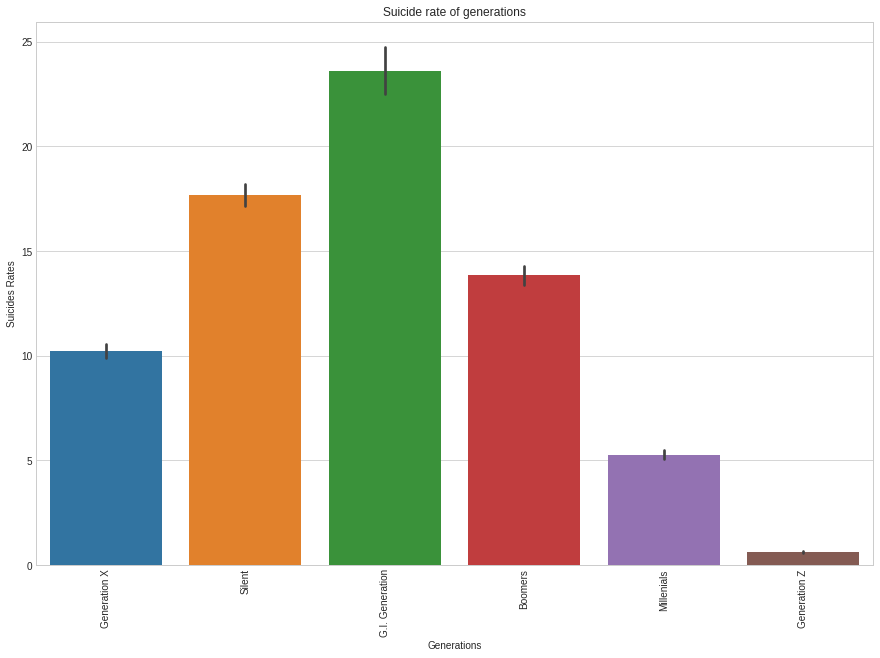

In [39]:
plt.figure(figsize=(15,10))
sns.barplot(x=suicide_rates['generation'],y=suicide_rates['suicides/100k pop'])
plt.xticks(rotation=90)
plt.xlabel("Generations")
plt.ylabel("Suicides Rates")
plt.title("Suicide rate of generations")
plt.show()